<h1>Practica 5 - Modelos Lineales + Correlación (Linear Models + Correlation)</h1>

<p>
     Objetivo:
    <li>Analizar la correlación entre variables.</li>
    <li>Crear un modelo de regresión lineal que prediga una variable (por ejemplo, cantidad de rentas de bicicleta).</li>
    <li>Obtener su R² Score (qué tan bien predice el modelo).</li>
</p>

<h3>Instalo e importo librerias</h3>

In [2]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 4.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/11.1 MB 2.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.1 MB 2.2 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/11.1 MB 2.3 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.1 MB 2.1 MB/s eta 0:00:05
   --------- ------------------------------ 2.6/11.1 MB 2.2 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.1 MB 2.2 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/11.1 MB 2.2 MB/s eta 0:00:04
   -------------- ------------------------- 3.9/11.1 MB 2.2 MB/s eta 0:00:04
   --------------- ------------------------ 4.2/11.1 MB 2.1 MB/s eta 0:00:04
   -------------

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


<h3> Cargar el dataset</h3>

In [4]:
df = pd.read_csv('csv/hour_cleaned.csv')

<h3>Ver la correlación entre variables </h3>

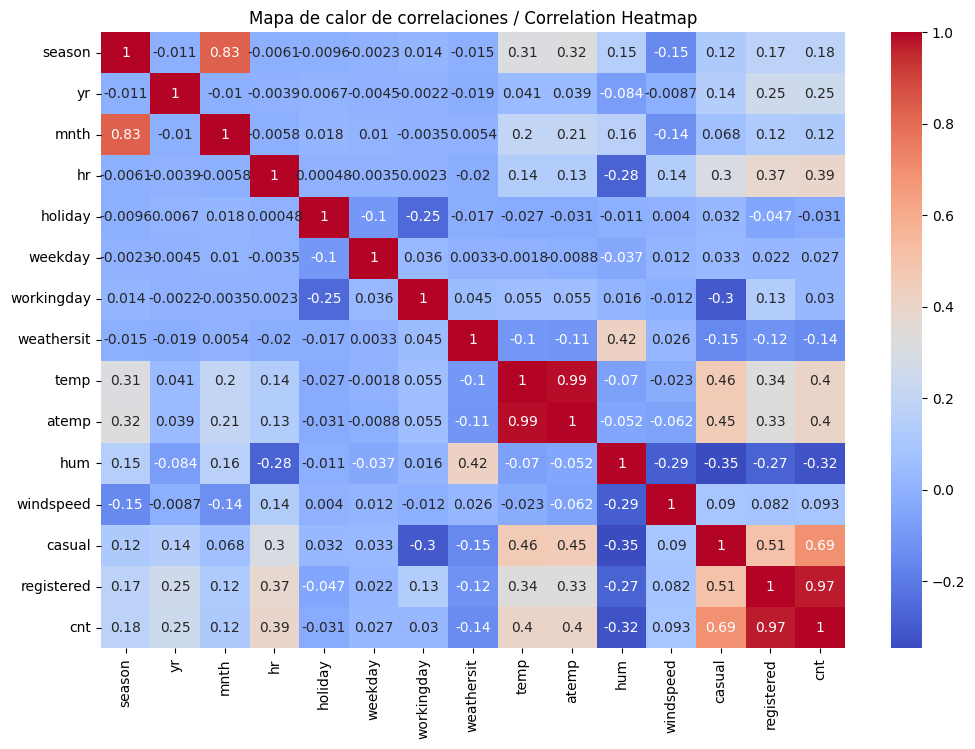

In [6]:
# Filtrar solo columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

plt.figure(figsize=(12,8))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones / Correlation Heatmap')
plt.show()


<h3>Generar el modelo lineal </h3>

In [8]:
# Variables independientes (X) y dependiente (y)
X = df[['temp']]  # independiente
y = df['cnt']     # dependiente

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)


<h3>Visualizar la relación </h3>

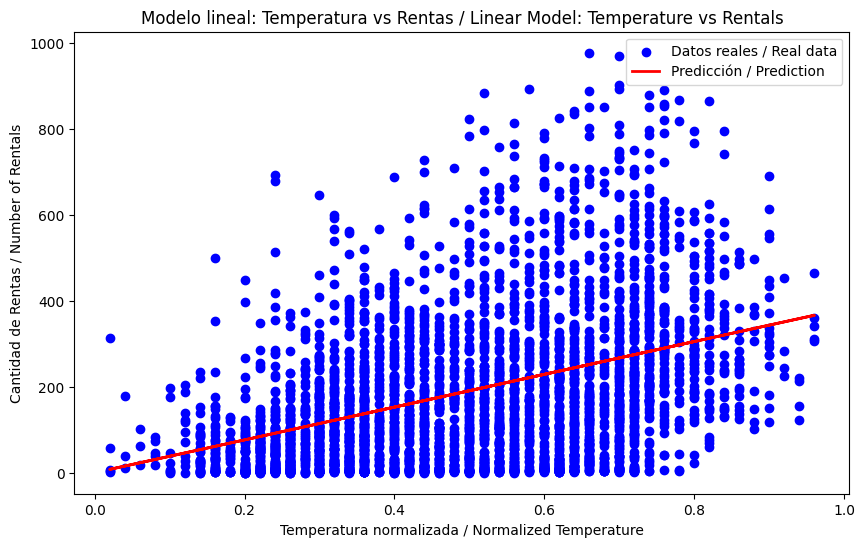

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales / Real data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicción / Prediction')
plt.title('Modelo lineal: Temperatura vs Rentas / Linear Model: Temperature vs Rentals')
plt.xlabel('Temperatura normalizada / Normalized Temperature')
plt.ylabel('Cantidad de Rentas / Number of Rentals')
plt.legend()
plt.show()


<h3>Obtener el R² Score </h3>

In [10]:
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.2f}')


R² Score: 0.17
